In [ ]:
        # data
        self.pn = None
        self.pp = None
        self.database = pd.DataFrame()
        self.spectrums = pd.DataFrame(columns=['title', 'spectrum'])
        self.identified_spectrums = []
        self.reference_positive = None
        self.reference_negative = None
        self.default_index_positive = 'data/references_index_positive_spec2vec.bin'
        self.default_index_negative = 'data/references_index_negative_spec2vec.bin'
        self.default_reference_positive = 'data/references_spectrums_positive.pickle'
        self.default_reference_negative = 'data/references_spectrums_negative.pickle'
        try:
            self.default_database = pd.read_csv('data/DeepMassStructureDB-v1.0.csv')
        except:
            self.ErrorMsg("Missing data files")
            return
        self.current_spectrum = None
        self.current_reference = None

        # initial
        self.Thread_LoadIndexPositive = None
        self.Thread_LoadIndexNegative = None
        self.Thread_LoadReference = None
        self.Thread_Identification = None
        self.Thread_Matching = None
        
        self.progressBar.setValue(0)
        self.progressBar.setFormat('Loading database')
        self.load_references_positive()
        try:
            self.deepmass_positive = Word2Vec.load("model/Ms2Vec_allGNPSpositive.hdf5")
            self.deepmass_negative = Word2Vec.load("model/Ms2Vec_allGNPSnegative.hdf5")
        except:
            self.ErrorMsg("Missing model files")
            return

In [ ]:
import DeepMASS2
def get_spectrum_from_mgf(path='./test.mgf'):


    return spectrum_list

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 30 10:13:32 2022

@author: DELL
"""

import os
import re
import hnswlib
import string
import random
import shutil
import pickle
import numpy as np
import pandas as pd

from itertools import chain


from matplotlib.figure import Figure
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5 import NavigationToolbar2QT as NavigationToolbar

import matchms.filtering as msfilters
from hnswlib import Index
from rdkit import Chem
from rdkit.Chem import Draw, rdFMCS
from molmass import Formula
from matchms.Spectrum import Spectrum
from matchms.importing import load_from_mgf,load_from_msp
from gensim.models import Word2Vec

from core.identification import identify_unknown, match_spectrum

In [4]:
deepmass_positive = Word2Vec.load("model/Ms2Vec_allGNPSpositive.hdf5")  # 尝试加载正离子模式的Word2Vec模型
deepmass_negative = Word2Vec.load("model/Ms2Vec_allGNPSnegative.hdf5")  # 尝试加载负离子模式的Word2Vec模型

In [5]:
default_index_positive = 'data/references_index_positive_spec2vec.bin'
default_index_negative = 'data/references_index_negative_spec2vec.bin'
default_reference_positive = 'data/references_spectrums_positive.pickle'
default_reference_negative = 'data/references_spectrums_negative.pickle'
default_database = pd.read_csv('data/DeepMassStructureDB-v1.0.csv')

C:\Users\lkr\AppData\Local\Temp\ipykernel_17012\859328759.py:5: DtypeWarning: Columns (20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  default_database = pd.read_csv('data/DeepMassStructureDB-v1.0.csv')


In [6]:
with open(default_reference_negative, 'rb') as file:
    reference_negative = pickle.load(file)

with open(default_reference_positive, 'rb') as file:
    reference_positive = pickle.load(file)

In [7]:
index_negative = Index(space = 'l2', dim = 300)
index_negative.load_index(default_index_negative)

index_positive = Index(space = 'l2', dim = 300)
index_positive.load_index(default_index_positive)

In [ ]:
from matchms.importing import load_from_mgf,load_from_msp

spectrum_list =[]
file_list = ['./MoNA-export-CASMI_2016.msp','./MoNA-export-CASMI_2016.msp']

for fileName in file_list:  # 遍历每一个文件名
    spectrum_list += [s for s in load_from_msp(fileName) if 'compound_name' in list(s.metadata.keys())]  # 从文件中加载谱图，并将其添加到列表中

In [9]:
titles = [s.metadata['compound_name'] for s in spectrum_list]  # 获取每一个谱图的标题
spectrums_df = pd.DataFrame({'title': titles, 'spectrum': spectrum_list})  # 创建一个DataFrame对象，用于存储谱图的标题和数据

In [11]:
spectrums_df

,title,spectrum
0,Fipronil desulfinyl,<matchms.Spectrum.Spectrum object at 0x000001E...
1,N-Cyclohexyl-2-benzothiazol-amine,<matchms.Spectrum.Spectrum object at 0x000001E...
2,Fipronil sulfone,<matchms.Spectrum.Spectrum object at 0x000001E...
3,Fipronil sulfide,<matchms.Spectrum.Spectrum object at 0x000001E...
4,Anthranilic acid,<matchms.Spectrum.Spectrum object at 0x000001E...
...,...,...
1239,2-Aminoanthracene,<matchms.Spectrum.Spectrum object at 0x000001E...
1240,"2,4-Dibromphenol",<matchms.Spectrum.Spectrum object at 0x000001E...
1241,"2,3-Dihydroxybiphenyl",<matchms.Spectrum.Spectrum object at 0x000001E...
1242,1-Naphthylamine,<matchms.Spectrum.Spectrum object at 0x000001E...


In [12]:
spectrum_list[10].metadata['ionmode']

'p'

In [81]:
from matchms import Fragments

spectrum_list[11].peaks = Fragments(
    mz=spectrum_list[11].mz,
    intensities=spectrum_list[11].intensities/spectrum_list[11].intensities.max()
    )
spectrum_list[11].intensities  

array([0.28828409, 1.        ])

In [82]:
sn1  =  identify_unknown(
    spectrum_list[11],
    index_positive,
    deepmass_positive,
    reference_positive,
    default_database
    )
sn1

In [77]:
ss = identify_unknown(
    spectrum_list[10],
    index_negative,
    deepmass_negative, 
    reference_negative, 
    default_database
    )
ss

AssertionError: peak intensities not normalized

In [72]:
ss.metadata

{'synon': '$:00in-source',
 'db#': 'SM883701',
 'inchikey': 'ZUHZGEOKBKGPSW-UHFFFAOYSA-N',
 'spectrum_type': 'MS2',
 'instrument_type': 'LC-ESI-QFT',
 'instrument': 'Q Exactive Plus Orbitrap Thermo Scientific',
 'collision_energy': '35  (nominal)',
 'formula': 'C10H22O5',
 'mw': '222',
 'smiles': 'COCCOCCOCCOCCOC',
 'cas': '143-24-8',
 'chebi': '46785',
 'chemspider': '13835433',
 'inchi': 'InChI=1S/C10H22O5/c1-11-3-5-13-7-9-15-10-8-14-6-4-12-2/h3-10H2,1-2H3',
 'accession': 'SM883701',
 'date': '2016.12.12',
 'author': 'Krauss M, Schymanski EL, Weidauer C, Schupke H, UFZ and Eawag',
 'license': 'CC BY',
 'copyright': 'Copyright (C) 2016 UFZ/Eawag',
 'publication': 'Schymanski, E. L.; Ruttkies, C.; Krauss, M.; Brouard, C.; Kind, T.; Dührkop, K.; Allen, F.; Vaniya, A.; Verdegem, D.; Böcker, S.; et al. Critical Assessment of Small Molecule Identification 2016: Automated Methods. Journal of Cheminformatics 2017, 9 (1). DOI:10.1186/s13321-017-0207-1',
 'comment': 'INTERNAL_ID 8837',
 'ioniz

In [83]:
import pickle
with open('test.pkl','bw') as f:
    pickle.dump([ss,sn1],f)
    

In [74]:
import pickle
with open('test.pkl','br') as f:
    res = pickle.load(f)

In [85]:
import pandas as pd

df = pd.DataFrame({
    'a':[1,2],
    'b':[3,4],
})
df['c'] = [5,6]
df

,a,b,c
0,1,3,5
1,2,4,6


In [91]:
formula = 'C10H22O5'
annotation = ss.metadata['annotation']
structural_table = annotation.loc[annotation['MolecularFormula'] == formula,:]
structural_table = structural_table.reset_index(drop = True)
structural_table

,Title,MolecularFormula,CanonicalSMILES,InChIKey,DeepMass Score
0,UNPD146552,C10H22O5,CCOCCOCCOCCOCCO,GTAKOUPXIUWZIA-UHFFFAOYSA-N,1.0000
1,UNPD76039,C10H22O5,CC(C)(O)[C@@](C)(O)[C@](C)(O)[C@@](C)(O)CO,YNWGIYBRIPKRJK-SLOTWNJKNA-N,0.9896
2,"L-(-)-Arabitol, permethyl-",C10H22O5,COCC(OC)C(OC)C(COC)OC,UKACKIRJWDAFEZ-UHFFFAOYSA-N,0.8468
3,tetraglyme,C10H22O5,COCCOCCOCCOCCOC,ZUHZGEOKBKGPSW-UHFFFAOYSA-N,0.7959


In [94]:
structural_table['CanonicalSMILES'][0]

'CCOCCOCCOCCOCCO'

In [96]:
annotation['CanonicalSMILES']

0                               CCOCCOCCOCCOCCO
1    CC(C)(O)[C@@](C)(O)[C@](C)(O)[C@@](C)(O)CO
2                         COCC(OC)C(OC)C(COC)OC
3                               COCCOCCOCCOCCOC
Name: CanonicalSMILES, dtype: object

In [102]:
ss.metadata['reference']

array([<matchms.Spectrum.Spectrum object at 0x000001E8802DAA90>,
      dtype=object)

In [29]:
annotation = sn.metadata['annotation']

In [41]:
annotation = ss.metadata['annotation']

In [76]:
np.unique(annotation['MolecularFormula'])

array(['C10H22O5'], dtype=object)

In [43]:
annotation['MolecularFormula'][0]

'C10H22O5'

In [35]:
sn.metadata['parent_mass']

'222.14672380399998'

In [44]:
ss.metadata['parent_mass']

'222.14672380399998'

In [49]:
formula = annotation['MolecularFormula'][0]
tr = annotation.loc[annotation['MolecularFormula'] == formula,:]

In [50]:
tr

,Title,MolecularFormula,CanonicalSMILES,InChIKey,DeepMass Score
0,UNPD146552,C10H22O5,CCOCCOCCOCCOCCO,GTAKOUPXIUWZIA-UHFFFAOYSA-N,1.0000
1,UNPD76039,C10H22O5,CC(C)(O)[C@@](C)(O)[C@](C)(O)[C@@](C)(O)CO,YNWGIYBRIPKRJK-SLOTWNJKNA-N,0.9896
2,"L-(-)-Arabitol, permethyl-",C10H22O5,COCC(OC)C(OC)C(COC)OC,UKACKIRJWDAFEZ-UHFFFAOYSA-N,0.8468
3,tetraglyme,C10H22O5,COCCOCCOCCOCCOC,ZUHZGEOKBKGPSW-UHFFFAOYSA-N,0.7959


In [58]:
tr.sort_values(by="DeepMass Score", ascending=False)#按照DeepMass Score排序


,Title,MolecularFormula,CanonicalSMILES,InChIKey,DeepMass Score
0,UNPD146552,C10H22O5,CCOCCOCCOCCOCCO,GTAKOUPXIUWZIA-UHFFFAOYSA-N,1.0000
1,UNPD76039,C10H22O5,CC(C)(O)[C@@](C)(O)[C@](C)(O)[C@@](C)(O)CO,YNWGIYBRIPKRJK-SLOTWNJKNA-N,0.9896
2,"L-(-)-Arabitol, permethyl-",C10H22O5,COCC(OC)C(OC)C(COC)OC,UKACKIRJWDAFEZ-UHFFFAOYSA-N,0.8468
3,tetraglyme,C10H22O5,COCCOCCOCCOCCOC,ZUHZGEOKBKGPSW-UHFFFAOYSA-N,0.7959


In [63]:
ck = spectrum_list[10].metadata['reference'] # 获取当前光谱的参考信息

In [67]:
reference_table = []  # 创建一个空列表，用于存储参考表格的数据
for sn in ck:  # 遍历当前光谱的参考信息
            if 'smiles' in sn.metadata.keys():  
                smiles = sn.metadata['smiles']  
            else: 
                smiles = ''  
            if 'compound_name' in sn.metadata.keys():  
                name = sn.metadata['compound_name']  
            else: 
                name = smiles  # 设置'name'的值为'smiles'的值
            if 'adduct' in sn.metadata.keys():  
                adduct = sn.metadata['adduct'] 
            else:  
                adduct = '' 
            if 'parent_mass' in sn.metadata.keys(): 
                parent_mass = sn.metadata['parent_mass'] 
            else: 
                parent_mass = '' 
            if 'database' in sn.metadata.keys():  
                ref_database = sn.metadata['database']  
            else: 
                ref_database = '' 
            reference_table.append([name, adduct, smiles, parent_mass, ref_database])  # 将数据添加到参考表格的数据列表中


In [108]:
# ss.metadata['reference']

In [69]:
reference_table = pd.DataFrame(reference_table, columns = [
    'name', 
    'adduct', 
    'smiles', 
    'parent_mass', 
    'database']
    )  # 创建一个DataFrame对象，用于存储参考表格的数据

In [114]:
import matplotlib.pyplot as plt


def plot_2_spectrum(spectrum,reference,loss=False):
    fig = Figure(figsize=(5, 5), dpi=300)
    fig.subplots_adjust(top=0.95,bottom=0.3,left=0.18,right=0.95)
    
    axes = fig.add_subplot(111)
    axes.tick_params(width=0.8,labelsize=3)
    axes.spines['bottom'].set_linewidth(0.5)
    axes.spines['left'].set_linewidth(0.5)
    axes.spines['right'].set_linewidth(0.5)
    axes.spines['top'].set_linewidth(0.5)
    axes.tick_params(width=0.8,labelsize=3)
    mz, abunds = spectrum.peaks.mz, spectrum.peaks.intensities
    mz1, abunds1 = reference.peaks.mz, reference.peaks.intensities
    if loss:
        try:
            spectrum = msfilters.add_parent_mass(spectrum)
            spectrum = msfilters.add_losses(spectrum, loss_mz_from=10.0, loss_mz_to=2000.0)
            reference = msfilters.add_parent_mass(reference)
            reference = msfilters.add_losses(reference, loss_mz_from=10.0, loss_mz_to=2000.0)
            mz, abunds = spectrum.losses.mz, spectrum.losses.intensities
            mz1, abunds1 = reference.losses.mz, reference.losses.intensities
        except:
            print('Cannot Plot Losses')
            return
            abunds /= np.max(abunds)
    abunds1 /= np.max(abunds1)
    axes.vlines(mz, ymin=0, ymax=abunds, color='r', lw = 0.5)
    axes.vlines(mz1, ymin = 0, ymax = -abunds1, color='b', lw = 0.5)
    axes.axhline(y=0,color='black', lw = 0.5)
    axes.set_xlabel('m/z', fontsize = 3.5)
    axes.set_ylabel('abundance', fontsize = 3.5)
    return fig

fig = plot_2_spectrum(ss.metadata['reference'][0],ss.metadata['reference'][1])
plt.show()

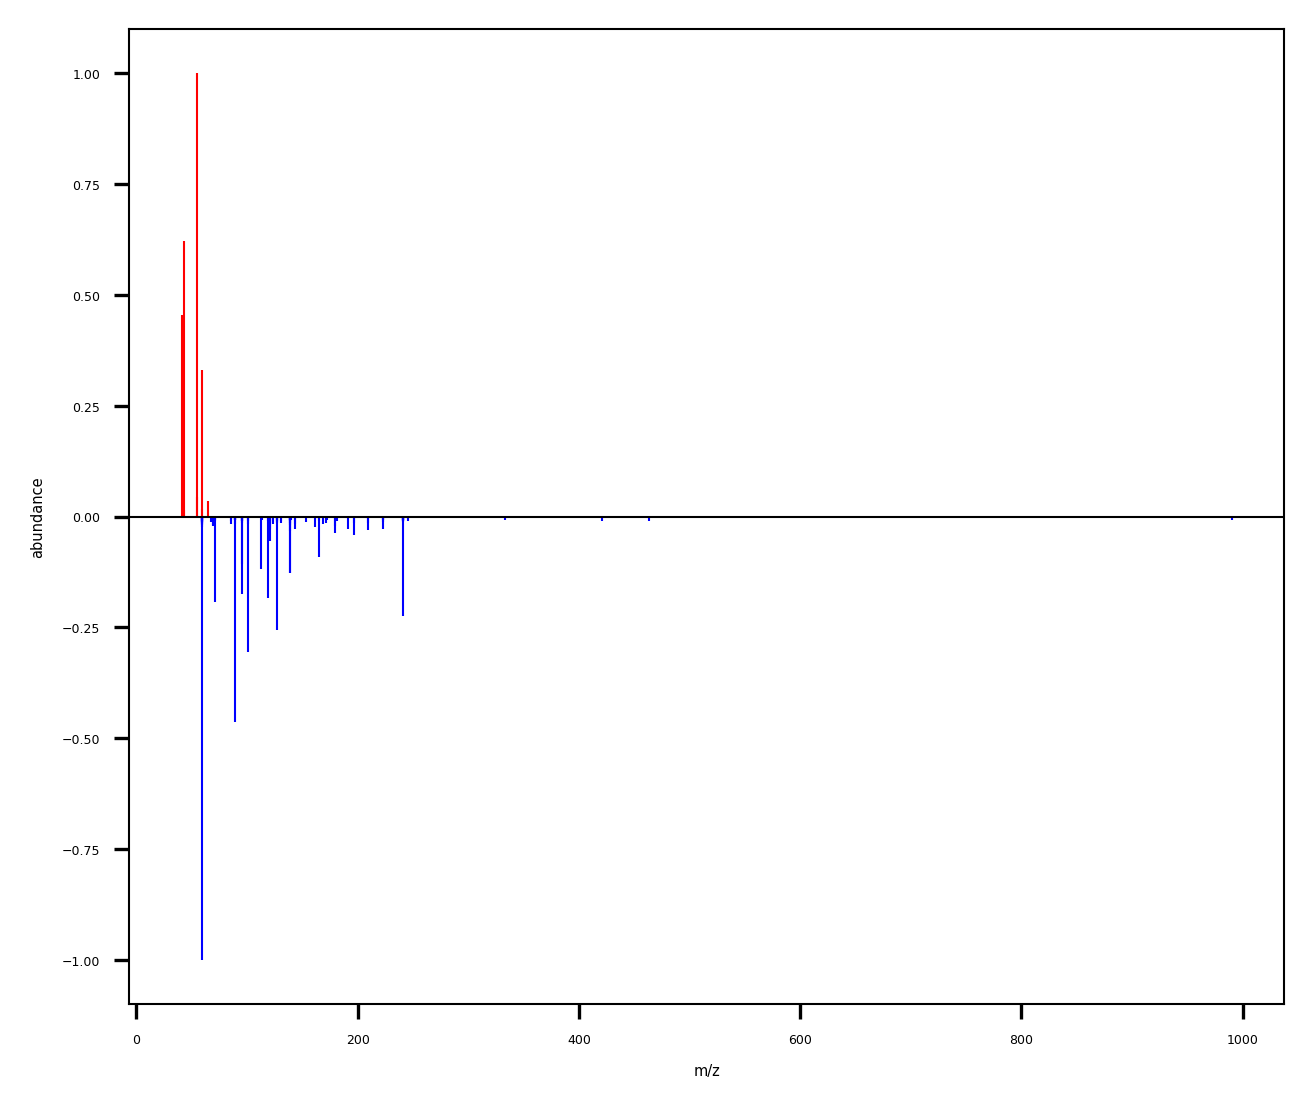

In [115]:
fig

In [ ]:
def plot_mol(highlight = False):
    mol_anno = Chem.MolFromSmiles(mol_anno)
    mol_ref = Chem.MolFromSmiles(mol_ref)
    
    if highlight:
        mcs = rdFMCS.FindMCS([mol_anno, mol_ref], bondCompare=rdFMCS.BondCompare.CompareOrderExact,
                                matchValences = True, ringMatchesRingOnly = True)
        mcs_str = mcs.smartsString
        mcs_mol = Chem.MolFromSmarts(mcs_str)
        allsubs_anno = tuple(chain.from_iterable(mol_anno.GetSubstructMatches(mcs_mol)))
        allsubs_ref = tuple(chain.from_iterable(mol_ref.GetSubstructMatches(mcs_mol)))
    else:
        allsubs_anno = ()
        allsubs_ref = ()
    
    if mol_anno is not None:
        file_name = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))
        Draw.MolToFile(mol_anno, 'temp/{}.png'.format(file_name), wedgeBonds=False, highlightAtoms=allsubs_anno)
    
    if mol_ref is not None:
        file_name = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))
        Draw.MolToFile(mol_ref, 'temp/{}.png'.format(file_name), wedgeBonds=False, highlightAtoms=allsubs_ref)
        

In [123]:
mol_anno = Chem.MolFromSmiles('CCC')
mol_ref = Chem.MolFromSmiles('CCNCC')
mcs = rdFMCS.FindMCS([mol_anno, mol_ref], bondCompare=rdFMCS.BondCompare.CompareOrderExact,
                        matchValences = True, ringMatchesRingOnly = True)
mcs_str = mcs.smartsString
mcs_mol = Chem.MolFromSmarts(mcs_str)
allsubs_anno = tuple(chain.from_iterable(mol_anno.GetSubstructMatches(mcs_mol)))
allsubs_ref = tuple(chain.from_iterable(mol_ref.GetSubstructMatches(mcs_mol)))

Draw.MolToImage(mol_ref, highlightAtoms=allsubs_ref, wedgeBonds=False)

In [135]:
ss.metadata['smiles']

'COCCOCCOCCOCCOC'

In [147]:
import pandas as pd
df = pd.DataFrame.from_dict(ss.metadata,orient='index', columns=['value'])
df.reset_index(inplace=True) # 重置index，将原来的index变为一列
df.rename(columns={'index': 'key'}, inplace=True) # 将这一列重命名为key
df
# print(df)


,key,value
0,synon,$:00in-source
1,db#,SM883701
2,inchikey,ZUHZGEOKBKGPSW-UHFFFAOYSA-N
3,spectrum_type,MS2
4,instrument_type,LC-ESI-QFT
...,...,...
62,ionmode,p
63,parent_mass,222.14672380399998
64,column_name,"Kinetex C18 EVO 2.6 um, 2.1x50 mm, precolumn 2..."
65,annotation,Title MolecularFormula...


In [148]:
df.to_csv()

',key,value\r\n0,synon,$:00in-source\r\n1,db#,SM883701\r\n2,inchikey,ZUHZGEOKBKGPSW-UHFFFAOYSA-N\r\n3,spectrum_type,MS2\r\n4,instrument_type,LC-ESI-QFT\r\n5,instrument,Q Exactive Plus Orbitrap Thermo Scientific\r\n6,collision_energy,35  (nominal)\r\n7,formula,C10H22O5\r\n8,mw,222\r\n9,smiles,COCCOCCOCCOCCOC\r\n10,cas,143-24-8\r\n11,chebi,46785\r\n12,chemspider,13835433\r\n13,inchi,"InChI=1S/C10H22O5/c1-11-3-5-13-7-9-15-10-8-14-6-4-12-2/h3-10H2,1-2H3"\r\n14,accession,SM883701\r\n15,date,2016.12.12\r\n16,author,"Krauss M, Schymanski EL, Weidauer C, Schupke H, UFZ and Eawag"\r\n17,license,CC BY\r\n18,copyright,Copyright (C) 2016 UFZ/Eawag\r\n19,publication,"Schymanski, E. L.; Ruttkies, C.; Krauss, M.; Brouard, C.; Kind, T.; Dührkop, K.; Allen, F.; Vaniya, A.; Verdegem, D.; Böcker, S.; et al. Critical Assessment of Small Molecule Identification 2016: Automated Methods. Journal of Cheminformatics 2017, 9 (1). DOI:10.1186/s13321-017-0207-1"\r\n20,comment,INTERNAL_ID 8837\r\n21,ionization,ESI

In [104]:
reference_table

,name,adduct,smiles,parent_mass,database
0,"""1,6-ANHYDRO-B-GLUCOSE""",[M-H]-,C1[C@@H]2[C@H]([C@@H]([C@H]([C@H](O1)O2)O)O)O,162.053276,GNPS
1,"2-[(2S,3S,4S)-3-[(1S)-1-acetyloxyethyl]-5-meth...",[M-H]-,COC(=O)C1=CO[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)...,464.153276,GNPS
2,"(1S,4aS,7S,7aS)-7-hydroxy-7-methyl-1-[(2S,3R,4...",[M-H]-,C[C@]1(O)CC[C@@H]2C(C(=O)O)=CO[C@@H](O[C@@H]3O...,376.134276,GNPS
3,DETHIOBIOTIN,[M-H]-,C[C@H]1[C@@H](CCCCCC(=O)O)NC(=N1)O,214.131276,GNPS
4,Malic acid,[M-H]-,OC(CC(O)=O)C(O)=O,134.021276,GNPS
...,...,...,...,...,...
295,kaempferol,[M-H]-,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,286.047276,GNPS
296,N-(2-FUROYL)GLYCINE,[M-H]-,C1=COC(=C1)C(=O)NCC(=O)O,169.037276,GNPS
297,ALLOSE,[M-H]-,C([C@@H]1[C@H]([C@H]([C@H](C(O)O1)O)O)O)O,180.063276,GNPS
298,sebacic_acid,[M-H]-,C(CCCCC(=O)O)CCCC(=O)O,202.120276,GNPS


In [110]:
sn.metadata['reference']

KeyError: 'reference'

In [111]:
ss.metadata['reference']

array([<matchms.Spectrum.Spectrum object at 0x000001E8802DAA90>,
      dtype=object)

In [2]:
import gradio as gr

with gr.Blocks() as demo:
    with gr.Group():
        with gr.Row():
            gr.HTML(
                """
<!Doctype html>
<html>
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
	<meta name="viewport" content="width=device-width, initial-scale=1.0" />
	<title>CSS 布局 &#8211; 水平 &#038; 垂直对齐 | 菜鸟教程</title>

  <meta name='robots' content='max-image-preview:large' />
<link rel="canonical" href="http://www.runoob.com/css/css-align.html" />
<meta name="keywords" content="CSS 布局 &#8211; 水平 &#038; 垂直对齐">
<meta name="description" content="CSS 布局 - 水平 &amp; 垂直对齐     水平 &amp; 垂直居中对齐    元素居中对齐 要水平居中对齐一个元素(如 &amp;lt;div&amp;gt;), 可以使用 margin: auto;。  设置到元素的宽度将防止它溢出到容器的边缘。 元素通过指定宽度，并将两边的空外边距平均分配：     div 元素是居中的    实例  [mycode3 type=&#039;css&#039;] .center {  ..">
		
	<link rel="shortcut icon" href="https://static.runoob.com/images/favicon.ico">
	<link rel="stylesheet" href="/wp-content/themes/runoob/style.css?v=1.177" type="text/css" media="all" />
<link rel="stylesheet" href="https://cdn.staticfile.org/font-awesome/4.7.0/css/font-awesome.min.css" media="all" />	
  <!--[if gte IE 9]><!-->
  <script src="https://cdn.staticfile.org/jquery/2.0.3/jquery.min.js"></script>
  <!--<![endif]-->
  <!--[if lt IE 9]>
     <script src="https://cdn.staticfile.org/jquery/1.9.1/jquery.min.js"></script>
     <script src="https://cdn.staticfile.org/html5shiv/r29/html5.min.js"></script>
  <![endif]-->
  <link rel="apple-touch-icon" href="https://static.runoob.com/images/icon/mobile-icon.png"/>
  <meta name="apple-mobile-web-app-title" content="菜鸟教程">
</head>
<body>

<!--  头部 -->
<div class="container logo-search">

  <div class="col search row-search-mobile">
    <form action="index.php">
      <input class="placeholder" placeholder="搜索……" name="s" autocomplete="off">
      
    </form>
  </div>

  <div class="row">
    <div class="col logo">
      <h1><a href="/">菜鸟教程 -- 学的不仅是技术，更是梦想！</a></h1>
    </div>
        <div class="col right-list"> 
    <button class="btn btn-responsive-nav btn-inverse" data-toggle="collapse" data-target=".nav-main-collapse" id="pull" style=""> <i class="fa fa-navicon"></i> </button>
    </div>
        
    <div class="col search search-desktop last">
      <div class="search-input" >
      <form action="//www.runoob.com/" target="_blank">
        <input class="placeholder" id="s" name="s" placeholder="搜索……"  autocomplete="off" style="height: 44px;">
      </form>
      
      </div>
    </div>
  </div>
</div>



<!-- 导航栏 -->
<!-- 导航栏 -->
<div class="container navigation">
	<div class="row">
		<div class="col nav">
			<ul class="pc-nav" id="runoob-detail-nav">
				<li><a href="//www.runoob.com/">首页</a></li>
				<li><a href="/html/html-tutorial.html">HTML</a></li>
				<li><a href="/css/css-tutorial.html">CSS</a></li>
				<li><a href="/js/js-tutorial.html">JavaScript</a></li>
				<li><a href="javascript:void(0);" data-id="vue">Vue</a></li>
				<li><a href="javascript:void(0);" data-id="bootstrap">Bootstrap</a></li>
				<li><a href="/nodejs/nodejs-tutorial.html">NodeJS</a></li>
				<li><a href="/python3/python3-tutorial.html">Python3</a></li>
				<li><a href="/python/python-tutorial.html">Python2</a></li>
				<li><a href="/java/java-tutorial.html">Java</a></li>
				<li><a href="/cprogramming/c-tutorial.html">C</a></li>
				<li><a href="/cplusplus/cpp-tutorial.html">C++</a></li>
				<li><a href="/csharp/csharp-tutorial.html">C#</a></li>
				<li><a href="/go/go-tutorial.html">Go</a></li>
				<li><a href="/sql/sql-tutorial.html">SQL</a></li>
				<li><a href="/linux/linux-tutorial.html">Linux</a></li>
				<li><a href="/jquery/jquery-tutorial.html">jQuery</a></li>
				<li><a href="/browser-history">本地书签</a></li>
				<!--
			
				<li><a href="/w3cnote/knowledge-start.html" style="font-weight: bold;" onclick="_hmt.push(['_trackEvent', '星球', 'click', 'start'])" title="我的圈子">我的圈子</a></li>				
				<li><a href="javascript:;" class="runoob-pop">登录</a></li>
				-->
      		</ul>
			<ul class="mobile-nav">
				<li><a href="//www.runoob.com/">首页</a></li>
				<li><a href="/html/html-tutorial.html">HTML</a></li>
				<li><a href="/css/css-tutorial.html">CSS</a></li>
				<li><a href="/js/js-tutorial.html">JS</a></li>
				<li><a href="/browser-history">本地书签</a></li>
				<li><a href="javascript:void(0)" class="search-reveal">Search</a> </li>
			</ul>
			
		</div>
	</div>
</div>

<div class="container sub-navigation sub-navigation-articles" style="display:none">
	<div class="row">
		<div class="col nav-sub">
		<ul id="python">
			<li class="cat-item"><a href="/python3/python3-tutorial.html">Python3 教程 <i class="fa fa-external-link" aria-hidden="true"></i></a></li>
			<li class="cat-item"><a href="/python/python-tutorial.html">Python2 教程 <i class="fa fa-external-link" aria-hidden="true"></i></a></li>
		</ul>
		<ul id="vue">
			<li class="cat-item"><a href="/vue3/vue3-tutorial.html">Vue3 教程 <i class="fa fa-external-link" aria-hidden="true"></i></a></li>
			<li class="cat-item"><a href="/vue/vue-tutorial.html">vue2 教程 <i class="fa fa-external-link" aria-hidden="true"></i></a></li>
		</ul>

		<ul id="bootstrap">
			<li class="cat-item"><a href="/bootstrap/bootstrap-tutorial.html">Bootstrap3 教程 <i class="fa fa-external-link" aria-hidden="true"></i></a></li>
			<li class="cat-item"><a href="/bootstrap4/bootstrap4-tutorial.html">Bootstrap4 教程 <i class="fa fa-external-link" aria-hidden="true"></i></a></li>
			<li class="cat-item"><a href="/bootstrap5/bootstrap5-tutorial.html">Bootstrap5 教程 <i class="fa fa-external-link" aria-hidden="true"></i></a></li>
			<li class="cat-item"><a href="/bootstrap/bootstrap-v2-tutorial.html">Bootstrap2 教程 <i class="fa fa-external-link" aria-hidden="true"></i></a></li>
		</ul>
		</div>
	</div>
</div><!--  内容  -->
<div class="container main">
	<!-- 中间 -->
	<div class="row">
	
<div class="runoob-col-md2">
<div class="left-column">
	<div class="tab" style="overflow: hidden;text-overflow: ellipsis;white-space: nowrap;">
	<i class="fa fa-list" aria-hidden="true"></i> 
	<span>CSS 教程</span>
	<a data-cate="5" href="javascript:void(0);" title="夜间模式"  id="moon"><i class="fa fa-moon-o" aria-hidden="true" style="line-height: 28px;font-size: 1.2em;margin: 2px 4px 0;"></i></a>
	<a data-cate="5" style="display:none;" href="javascript:void(0);" title="日间模式"  id="sun" ><i class="fa fa-sun-o" aria-hidden="true" style="line-height: 28px;font-size: 1.2em;margin: 2px 4px 0;line-height: 28px;
}"></i></a>

	</div>
	<div class="sidebar-box gallery-list">
		<div class="design" id="leftcolumn">
						<a target="_top" data-p="par" title="CSS 教程"  href="/css/css-tutorial.html" >
			CSS 教程			</a>
						<a target="_top" data-p="par" title="CSS 简介"  href="/css/css-intro.html" >
			CSS 简介			</a>
						<a target="_top" data-p="par" title="CSS 语法"  href="/css/css-syntax.html" >
			CSS 语法			</a>
						<a target="_top" data-p="par" title="CSS Id 和 Class选择器"  href="/css/css-id-class.html" >
			CSS Id 和 Class选择器			</a>
						<a target="_top" data-p="par" title="CSS 创建"  href="/css/css-howto.html" >
			CSS 创建			</a>
						<a target="_top" data-p="par" title="CSS Backgrounds(背景)"  href="/css/css-background.html" >
			CSS Backgrounds(背景)			</a>
						<a target="_top" data-p="par" title="CSS Text(文本)"  href="/css/css-text.html" >
			CSS Text(文本)			</a>
						<a target="_top" data-p="par" title="CSS Fonts(字体)"  href="/css/css-font.html" >
			CSS Fonts(字体)			</a>
						<a target="_top" data-p="par" title="CSS 链接(link)"  href="/css/css-link.html" >
			CSS 链接(link)			</a>
						<a target="_top" data-p="par" title="CSS 列表"  href="/css/css-list.html" >
			CSS 列表			</a>
						<a target="_top" data-p="par" title="CSS Table(表格)"  href="/css/css-table.html" >
			CSS Table(表格)			</a>
						<a target="_top" data-p="par" title="CSS 盒子模型"  href="/css/css-boxmodel.html" >
			CSS 盒子模型			</a>
						<a target="_top" data-p="par" title="CSS Border(边框)"  href="/css/css-border.html" >
			CSS Border(边框)			</a>
						<a target="_top" data-p="par" title="CSS 轮廓（outline）属性"  href="/css/css-outline.html" >
			CSS 轮廓（outline）属性			</a>
						<a target="_top" data-p="par" title="CSS margin(外边距)"  href="/css/css-margin.html" >
			CSS margin(外边距)			</a>
						<a target="_top" data-p="par" title="CSS padding（填充）"  href="/css/css-padding.html" >
			CSS padding（填充）			</a>
						<a target="_top" data-p="par" title="CSS 分组和嵌套"  href="/css/css-grouping-nesting.html" >
			CSS 分组和嵌套			</a>
						<a target="_top" data-p="par" title="CSS 尺寸 (Dimension)"  href="/css/css-dimension.html" >
			CSS 尺寸 (Dimension)			</a>
						<a target="_top" data-p="par" title="CSS Display(显示) 与 Visibility（可见性）"  href="/css/css-display-visibility.html" >
			CSS Display(显示)			</a>
						<a target="_top" data-p="par" title="CSS Position(定位)"  href="/css/css-positioning.html" >
			CSS Position(定位)			</a>
			<a target="_top" title="CSS Overflow" href="/css/css-overflow.html">CSS Overflow	</a>			<a target="_top" data-p="par" title="CSS Float（浮动）"  href="/css/css-float.html" >
			CSS Float（浮动）			</a>
						<a target="_top" data-p="par" title="CSS 布局 &#8211; 水平 &#038; 垂直对齐"  href="/css/css-align.html" >
			CSS  对齐			</a>
			<a target="_top" href="css-combinators.html">
	CSS 组合选择符	</a>			<a target="_top" data-p="par" title="CSS 伪类"  href="/css/css-pseudo-classes.html" >
			CSS 伪类			</a>
						<a target="_top" data-p="par" title="CSS 伪元素"  href="/css/css-pseudo-elements.html" >
			CSS 伪元素			</a>
						<a target="_top" data-p="par" title="CSS 导航栏"  href="/css/css-navbar.html" >
			CSS 导航栏			</a>
			<a target="_top" title="CSS 下拉菜单" href="css-dropdowns.html"> CSS 下拉菜单 </a>
<a target="_top" title="CSS 提示工具(Tooltip)" href="css-tooltip.html"> CSS 提示工具</a>			<a target="_top" data-p="par" title="CSS 图片廊"  href="/css/css-image-gallery.html" >
			CSS 图片廊			</a>
						<a target="_top" data-p="par" title="CSS 图像透明/不透明"  href="/css/css-image-transparency.html" >
			CSS 图像透明/不透明			</a>
						<a target="_top" data-p="par" title="CSS 图像拼合技术"  href="/css/css-image-sprites.html" >
			CSS 图像拼合技术			</a>
						<a target="_top" data-p="par" title="CSS 媒体类型"  href="/css/css-mediatypes.html" >
			CSS 媒体类型			</a>
						<a target="_top" data-p="par" title="CSS 属性选择器"  href="/css/css-attribute-selectors.html" >
			CSS 属性选择器			</a>
			<a target="_top" title="CSS 表单" href="/css/css-form.html">CSS 表单</a>
<a target="_top" title="CSS 计数器" href="/css/css-counters.html">CSS 计数器</a>
<a target="_top" title="CSS 网页布局" href="/css/css-website-layout.html">CSS 网页布局</a>
<a target="_top" title="CSS !important" href="/css/css-important.html">CSS !important</a>			<a target="_top" data-p="par" title="CSS 总结"  href="/css/css-summary.html" >
			CSS 总结			</a>
						<a target="_top" data-p="par" title="CSS 实例"  href="/css/css-examples.html" >
			CSS 实例			</a>
			<br><h2 class="left"><span class="left_h2">CSS3</span> 教程</h2>
<a target="_top" title="CSS3 教程"  href="/css3/css3-tutorial.html" >CSS3 教程</a>
<a target="_top" title="CSS3 简介"  href="/css3/css3-intro.html" >CSS3 简介</a>
<a target="_top" title="CSS3 边框"  href="/css3/css3-borders.html" >CSS3 边框	</a>
<a target="_top" title="CSS3  圆角" href="css3-border-radius.html"> CSS3 圆角 </a>
<a target="_top" title="CSS3 背景"  href="/css3/css3-backgrounds.html" >CSS3 背景	</a>
<a target="_top" href="/css3/css3-gradients.html">CSS3 渐变	</a>
<a target="_top" title="CSS3 文本效果"  href="/css3/css3-text-effects.html" >CSS3 文本效果	</a>
<a target="_top" title="CSS3 字体"  href="/css3/css3-fonts.html" >CSS3 字体</a>
<a target="_top" title="CSS3 2D 转换"  href="/css3/css3-2dtransforms.html" >CSS3 2D 转换</a>
<a target="_top" title="CSS3 3D 转换"  href="/css3/css3-3dtransforms.html" >CSS3 3D 转换</a>
<a target="_top" title="CSS3 过渡"  href="/css3/css3-transitions.html" >CSS3 过渡	</a>
<a target="_top" title="CSS3 动画"  href="/css3/css3-animations.html" >CSS3 动画</a>
<a target="_top" title="CSS3 多列"  href="/css3/css3-multiple-columns.html" >CSS3 多列</a>
<a target="_top" title="CSS3 用户界面"  href="/css3/css3-user-interface.html" >CSS3 用户界面</a>
<a target="_top" title="CSS 图片"  href="/css3/css3-images.html" >CSS3 图片</a>
<a target="_top" title="CSS 按钮"  href="/css3/css3-buttons.html" >CSS3 按钮	</a>
<a target="_top" title="CSS 分页实例"  href="/css3/css3-pagination.html" >CSS3 分页</a>
<a target="_top" title="CSS3 框大小"  href="/css3/css3-box-sizing.html" >CSS3 框大小</a>
<a target="_top" title="CSS3 弹性盒子"  href="/css3/css3-flexbox.html" >CSS3 弹性盒子	</a>
<a target="_top" title="CSS3 多媒体查询"  href="/css3/css3-mediaqueries.html" >CSS3 多媒体查询</a>
<a target="_top" title="CSS3 多媒体查询实例"  href="/css3/css3-mediaqueries-ex.html" >CSS3 多媒体查询实例</a>
<br>
<h2 class="left"><span class="left_h2">CSS</span> 响应式设计</h2>
<a target="_top" href="/css/css-rwd-viewport.html">Viewport</a>
<a target="_top" href="/css/css-rwd-grid.html"> 网格视图</a>
<a target="_top" href="/css/css-rwd-mediaqueries.html">媒体查询</a>
<a target="_top" href="/css/css-rwd-images.html">图片</a>
<a target="_top" href="/css/css-rwd-videos.html">视频(Video)</a>
<a target="_top" href="/css/css-rwd-frameworks.html">框架</a>
<br>
<h2 class="left"><span class="left_h2">CSS</span> 参考手册</h2>
<a target="_top" href="/cssref/css-reference.html" >CSS 参考手册</a>
<a target="_top" href="/cssref/css-selectors.html">CSS 选择器</a>
<a target="_top" href="/cssref/css-ref-aural.html">CSS 语音参考</a>
<a target="_top" href="/cssref/css-websafe-fonts.html">CSS Web安全字体</a>
<a target="_top" title="CSS 动画" href="/cssref/css-animatable.html"> CSS 动画 </a>
<a target="_top" href="/cssref/css-units.html">CSS 单位</a>
<a target="_top" href="/cssref/css-colors.html">CSS 颜色</a>
<a target="_top" href="/cssref/css-colors-legal.html">CSS 颜色值</a>
<a target="_top" href="/cssref/css-colornames.html">CSS 颜色名</a>
<a target="_top" href="/cssref/css-colorsfull.html">CSS 十六进制颜色</a>	
		</div>
	</div>	
</div>
</div>	<div class="col middle-column">
		
	
	<div class="article">
		
		<div class="previous-next-links">
			<div class="previous-design-link"><i style="font-size:16px;" class="fa fa-arrow-left" aria-hidden="true"></i> <a href="http://www.runoob.com/css/css-float.html" rel="prev"> CSS Float（浮动）</a> </div>
			<div class="next-design-link"><a href="http://www.runoob.com/css/css-pseudo-classes.html" rel="next"> CSS 伪类</a> <i style="font-size:16px;" class="fa fa-arrow-right" aria-hidden="true"></i></div>
		</div>
<div class="article-heading-ad" style="display: block;">
<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-5751451760833794"
     crossorigin="anonymous"></script>
<!-- 728*90 固定 -->
<ins class="adsbygoogle"
     style="display:inline-block;width:728px;height:90px"
     data-ad-client="ca-pub-5751451760833794"
     data-ad-slot="2147566827"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>
		</div>
		<div class="article-body">
		
			<div class="article-intro" id="content">
			
			<h1>CSS 布局 - 水平 & 垂直对齐</span>
</h1>
<hr>
<div style="text-align:center">
<div style="border:1px solid gray;padding:2px 14px;margin-left:auto;margin-right:auto;width:45%;background-color:#e5eecc;text-align:left">
<h2>水平 & 垂直居中对齐</h2>
</div>
</div>
<hr>
<h2>元素居中对齐</h2>
<p>要水平居中对齐一个元素(如 &lt;div&gt;), 可以使用 <span class="marked">margin: auto;</span>。</p>

<p>设置到元素的宽度将防止它溢出到容器的边缘。</p>
<p>元素通过指定宽度，并将两边的空外边距平均分配：</p>

<div style="margin:0 auto;width:50%;border:3px solid green;padding:10px;">
  <p>div 元素是居中的</p>
</div>
<br>
<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">.center</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">margin:</span><span class="hl-code"> </span><span class="hl-string">auto</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">width:</span><span class="hl-code"> </span><span class="hl-number">50</span><span class="hl-string">%</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">border:</span><span class="hl-code"> </span><span class="hl-number">3</span><span class="hl-string">px</span><span class="hl-code"> </span><span class="hl-string">solid</span><span class="hl-code"> </span><span class="hl-var">green</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">padding:</span><span class="hl-code"> </span><span class="hl-number">10</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_container" class="tryitbtn">尝试一下 »</a>
</div>
<p><b>注意:</b> 如果没有设置  <span class="marked">width</span> 属性(或者设置 100%)，居中对齐将不起作用。</p>

<hr>
<h2>文本居中对齐</h2>
<p>如果仅仅是为了文本在元素内居中对齐，可以使用 <span class="marked">text-align: center;</span></p>

<div style="text-align:center;border:3px solid green">
  <p>文本居中对齐</p>
</div>
<br>
<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">.center</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">text-align:</span><span class="hl-code"> </span><span class="hl-string">center</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">border:</span><span class="hl-code"> </span><span class="hl-number">3</span><span class="hl-string">px</span><span class="hl-code"> </span><span class="hl-string">solid</span><span class="hl-code"> </span><span class="hl-var">green</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_text" class="tryitbtn">尝试一下 »</a>
</div>

<p><strong>提示:</strong> 更多文本对齐实例，请参阅 <a target="_blank" href="css-text.html">CSS 文本</a> 章节。</p>

<hr>
<h2>图片居中对齐</h2>
<p>要让图片居中对齐, 可以使用 <span class="marked">margin: auto;</span> 并将它放到 <strong>块</strong> 元素中:</p>
<img decoding="async" src="//static.runoob.com/images/mix/paris.jpg" alt="Paris" style="width:45%;display:block;margin:0 auto">
<br>
<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">img</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">display:</span><span class="hl-code"> </span><span class="hl-string">block</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">margin:</span><span class="hl-code"> </span><span class="hl-string">auto</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">width:</span><span class="hl-code"> </span><span class="hl-number">40</span><span class="hl-string">%</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_image" class="tryitbtn">尝试一下 »</a>
</div><hr>
<h2>左右对齐 - 使用定位方式</h2>
<p>我们可以使用 <span class="marked">position: absolute;</span> 属性来对齐元素:</p>

<div style="position:relative;margin-bottom:180px">
<div style="position: absolute;right: 0px;width: 300px;border: 3px solid #73AD21;padding: 10px;">
 <p>菜鸟教程 -- 学的不仅是技术，更是梦想！！！</p>
</div>
</div>
<br>
<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">.right</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">position:</span><span class="hl-code"> </span><span class="hl-string">absolute</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">right:</span><span class="hl-code"> </span><span class="hl-number">0</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">width:</span><span class="hl-code"> </span><span class="hl-number">300</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">border:</span><span class="hl-code"> </span><span class="hl-number">3</span><span class="hl-string">px</span><span class="hl-code"> </span><span class="hl-string">solid</span><span class="hl-code"> </span><span class="hl-var">#73AD21</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">padding:</span><span class="hl-code"> </span><span class="hl-number">10</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_pos" class="tryitbtn">尝试一下 »</a>
</div>

<p class="note"><span>注释：</span>绝对定位元素会被从正常流中删除，并且能够交叠元素。</p>

<p><strong>提示:</strong> 当使用 <span class="marked">position</span> 来对齐元素时, 通常 <span class="marked">&lt;body&gt;</span> 元素会设置
<span class="marked">margin</span> 和 <span class="marked">padding</span> 。 这样可以避免在不同的浏览器中出现可见的差异。</p>
<p>当使用 position 属性时，IE8 以及更早的版本存在一个问题。如果容器元素（在我们的案例中是 &lt;div class="container"&gt;）设置了指定的宽度，并且省略了 !DOCTYPE 声明，那么 IE8 以及更早的版本会在右侧增加 17px 的外边距。这似乎是为滚动条预留的空间。当使用 position 属性时，请始终设置 !DOCTYPE 声明：</p>

<br>
<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">body</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">margin:</span><span class="hl-code"> </span><span class="hl-number">0</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">padding:</span><span class="hl-code"> </span><span class="hl-number">0</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span><span class="hl-code">
 
</span><span class="hl-identifier">.container</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">position:</span><span class="hl-code"> </span><span class="hl-string">relative</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">width:</span><span class="hl-code"> </span><span class="hl-number">100</span><span class="hl-string">%</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span><span class="hl-code">
 
</span><span class="hl-identifier">.right</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">position:</span><span class="hl-code"> </span><span class="hl-string">absolute</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">right:</span><span class="hl-code"> </span><span class="hl-number">0</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">width:</span><span class="hl-code"> </span><span class="hl-number">300</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">background-color:</span><span class="hl-code"> </span><span class="hl-var">#b0e0e6</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_pos_crossbrowser2" class="tryitbtn">尝试一下 »</a>
</div><hr>
<h2>左右对齐 - 使用 float 方式</h2>
<p>我们也可以使用 <span class="marked">float</span> 属性来对齐元素:</p>

<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">.right</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">float:</span><span class="hl-code"> </span><span class="hl-string">right</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">width:</span><span class="hl-code"> </span><span class="hl-number">300</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">border:</span><span class="hl-code"> </span><span class="hl-number">3</span><span class="hl-string">px</span><span class="hl-code"> </span><span class="hl-string">solid</span><span class="hl-code"> </span><span class="hl-var">#73AD21</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">padding:</span><span class="hl-code"> </span><span class="hl-number">10</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_float" class="tryitbtn">尝试一下 »</a>
</div>
<p>当像这样对齐元素时，对 &lt;body&gt; 元素的外边距和内边距进行预定义是一个好主意。这样可以避免在不同的浏览器中出现可见的差异。</p>





<blockquote><p>注意：如果子元素的高度大于父元素，且子元素设置了浮动，那么子元素将溢出，这时候你可以使用 "<span class="marked">clearfix</span>(清除浮动)" 来解决该问题。</p></blockquote>




<p>我们可以在父元素上添加 overflow: auto; 来解决子元素溢出的问题:</p>

<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">.clearfix</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">overflow:</span><span class="hl-code"> </span><span class="hl-string">auto</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_layout_clearfix" class="tryitbtn">尝试一下 »</a>
</div>
<p>当使用 float 属性时，IE8 以及更早的版本存在一个问题。如果省略 !DOCTYPE 声明，那么 IE8 以及更早的版本会在右侧增加 17px 的外边距。这似乎是为滚动条预留的空间。当使用 float 属性时，请始终设置 !DOCTYPE 声明：</p>


<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">body</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">margin:</span><span class="hl-code"> </span><span class="hl-number">0</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">padding:</span><span class="hl-code"> </span><span class="hl-number">0</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span><span class="hl-code">
 
</span><span class="hl-identifier">.right</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">float:</span><span class="hl-code"> </span><span class="hl-string">right</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">width:</span><span class="hl-code"> </span><span class="hl-number">300</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">background-color:</span><span class="hl-code"> </span><span class="hl-var">#b0e0e6</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_pos_crossbrowser" class="tryitbtn">尝试一下 »</a>
</div>
<hr>
<h2>垂直居中对齐 - 使用 padding</h2>
<p>CSS 中有很多方式可以实现垂直居中对齐。 一个简单的方式就是头部顶部使用 <span class="marked">padding</span>:</p>
<div style="border:3px solid green;padding:70px 2px;">
  <p>我是垂直居中。</p>
</div><br>
<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">.center</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">padding:</span><span class="hl-code"> </span><span class="hl-number">70</span><span class="hl-string">px</span><span class="hl-code"> </span><span class="hl-number">0</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">border:</span><span class="hl-code"> </span><span class="hl-number">3</span><span class="hl-string">px</span><span class="hl-code"> </span><span class="hl-string">solid</span><span class="hl-code"> </span><span class="hl-var">green</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_padding" class="tryitbtn">尝试一下 »</a>
</div><p>如果要水平和垂直都居中，可以使用 <span class="marked">padding</span> 和 <span class="marked">text-align: center</span>:</p>

<div style="border:3px solid green;padding:70px 2px;;text-align:center;">
  <p>我是水平和垂直都居中的。</p>
</div>
<br>
<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">.center</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">padding:</span><span class="hl-code"> </span><span class="hl-number">70</span><span class="hl-string">px</span><span class="hl-code"> </span><span class="hl-number">0</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">border:</span><span class="hl-code"> </span><span class="hl-number">3</span><span class="hl-string">px</span><span class="hl-code"> </span><span class="hl-string">solid</span><span class="hl-code"> </span><span class="hl-var">green</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">text-align:</span><span class="hl-code"> </span><span class="hl-string">center</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_padding2" class="tryitbtn">尝试一下 »</a>
</div>
<hr>
<h2>垂直居中 - 使用 line-height</h2>
<div style="line-height:200px; height:200px;border:3px solid green;text-align:center;">
  <p style=" line-height:1.2; display:inline-block; vertical-align:middle;">我是垂直居中的。</p>
</div>
<br>
<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">.center</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">line-height:</span><span class="hl-code"> </span><span class="hl-number">200</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">height:</span><span class="hl-code"> </span><span class="hl-number">200</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">border:</span><span class="hl-code"> </span><span class="hl-number">3</span><span class="hl-string">px</span><span class="hl-code"> </span><span class="hl-string">solid</span><span class="hl-code"> </span><span class="hl-var">green</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">text-align:</span><span class="hl-code"> </span><span class="hl-string">center</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span><span class="hl-code">
 
</span><span class="hl-comment">/*</span><span class="hl-comment"> 如果文本有多行，添加以下代码: </span><span class="hl-comment">*/</span><span class="hl-code">
</span><span class="hl-identifier">.center</span><span class="hl-code"> </span><span class="hl-identifier">p</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">line-height:</span><span class="hl-code"> </span><span class="hl-number">1.5</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">display:</span><span class="hl-code"> </span><span class="hl-string">inline-block</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">vertical-align:</span><span class="hl-code"> </span><span class="hl-string">middle</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_line" class="tryitbtn">尝试一下 »</a>
</div>
<hr>
<h2>垂直居中 - 使用 position 和 transform</h2>
<p>除了使用 <span class="marked">padding</span> 和 <span class="marked">line-height</span> 属性外,我们还可以使用 <span class="marked">transform</span> 属性来设置垂直居中:</p>
<br>
<div class="example">
<h2 class="example">实例</h2>
<div class="example_code">
<div class="hl-main"><span class="hl-identifier">.center</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code"> 
    </span><span class="hl-reserved">height:</span><span class="hl-code"> </span><span class="hl-number">200</span><span class="hl-string">px</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">position:</span><span class="hl-code"> </span><span class="hl-string">relative</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">border:</span><span class="hl-code"> </span><span class="hl-number">3</span><span class="hl-string">px</span><span class="hl-code"> </span><span class="hl-string">solid</span><span class="hl-code"> </span><span class="hl-var">green</span><span class="hl-reserved"></span><span class="hl-code">; 
</span><span class="hl-brackets">}</span><span class="hl-code">
 
</span><span class="hl-identifier">.center</span><span class="hl-code"> </span><span class="hl-identifier">p</span><span class="hl-code"> </span><span class="hl-brackets">{</span><span class="hl-code">
    </span><span class="hl-reserved">margin:</span><span class="hl-code"> </span><span class="hl-number">0</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">position:</span><span class="hl-code"> </span><span class="hl-string">absolute</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">top:</span><span class="hl-code"> </span><span class="hl-number">50</span><span class="hl-string">%</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">left:</span><span class="hl-code"> </span><span class="hl-number">50</span><span class="hl-string">%</span><span class="hl-reserved"></span><span class="hl-code">;
    </span><span class="hl-reserved">transform:</span><span class="hl-code"> </span><span class="hl-code">translate</span><span class="hl-code">(-</span><span class="hl-number">50</span><span class="hl-string">%</span><span class="hl-code">, -</span><span class="hl-number">50</span><span class="hl-string">%</span><span class="hl-code">)</span><span class="hl-reserved"></span><span class="hl-code">;
</span><span class="hl-brackets">}</span></div>
</div>
<br><a target="_blank" href="/try/try.php?filename=trycss_align_transform" class="tryitbtn">尝试一下 »</a>
</div>

<p><strong>提示:</strong> 更多 transform 属性内容可以参阅 <a target="_blank" href="css3-2dtransforms.html">2D 翻转章节</a>。</p>

<hr>
<h2>更多实例</h2>
<p><a href="https://c.runoob.com/codedemo/3360" target="_blank"> CSS 使用 margin 让 div 居中对齐</a></p>
<p><a href="https://c.runoob.com/codedemo/3361" target="_blank"> CSS 使用绝对定位 让 div 右对齐</a></p>			<!-- 其他扩展 -->
						
			</div>
			
		</div>
		
		<div class="previous-next-links">
			<div class="previous-design-link"><i style="font-size:16px;" class="fa fa-arrow-left" aria-hidden="true"></i> <a href="http://www.runoob.com/css/css-float.html" rel="prev"> CSS Float（浮动）</a> </div>
			<div class="next-design-link"><a href="http://www.runoob.com/css/css-pseudo-classes.html" rel="next"> CSS 伪类</a> <i style="font-size:16px;" class="fa fa-arrow-right" aria-hidden="true"></i></div>
		</div>
		<!-- 笔记列表 -->
		<style>
.wrapper {
  /*text-transform: uppercase; */
  background: #ececec;
  color: #555;
  cursor: pointer;
  font-family: "Gill Sans", Impact, sans-serif;
  font-size: 20px;
  position: relative;
  text-align: center;
  width: 200px;
  -webkit-transform: translateZ(0); /* webkit flicker fix */
  -webkit-font-smoothing: antialiased; /* webkit text rendering fix */
}

.wrapper .tooltip {
  white-space: nowrap;
  font-size: 14px;
  text-align: left;
  background: #96b97d;
  bottom: 100%;
  color: #fff;
  display: block;
  left: -25px;
  margin-bottom: 15px;
  opacity: 0;
  padding: 14px;
  pointer-events: none;
  position: absolute;
  
  -webkit-transform: translateY(10px);
     -moz-transform: translateY(10px);
      -ms-transform: translateY(10px);
       -o-transform: translateY(10px);
          transform: translateY(10px);
  -webkit-transition: all .25s ease-out;
     -moz-transition: all .25s ease-out;
      -ms-transition: all .25s ease-out;
       -o-transition: all .25s ease-out;
          transition: all .25s ease-out;
  -webkit-box-shadow: 2px 2px 6px rgba(0, 0, 0, 0.28);
     -moz-box-shadow: 2px 2px 6px rgba(0, 0, 0, 0.28);
      -ms-box-shadow: 2px 2px 6px rgba(0, 0, 0, 0.28);
       -o-box-shadow: 2px 2px 6px rgba(0, 0, 0, 0.28);
          box-shadow: 2px 2px 6px rgba(0, 0, 0, 0.28);
}
.tooltip a {
	color:#fff;
}
/* This bridges the gap so you can mouse into the tooltip without it disappearing */
.wrapper .tooltip:before {
  bottom: -20px;
  content: " ";
  display: block;
  height: 20px;
  left: 0;
  position: absolute;
  width: 100%;
}  

/* CSS Triangles - see Trevor's post */
.wrapper .tooltip:after {
  border-left: solid transparent 10px;
  border-right: solid transparent 10px;
  border-top: solid #96b97d 10px;
  bottom: -10px;
  content: " ";
  height: 0;
  left: 20%;
  margin-left: -13px;
  position: absolute;
  width: 0;
}
.wrapper .tooltip1 {
	margin-left: 50px;
	padding-top: 0px;
}
/*
.wrapper:hover .tooltip {
  opacity: 1;
  pointer-events: auto;
  -webkit-transform: translateY(0px);
     -moz-transform: translateY(0px);
      -ms-transform: translateY(0px);
       -o-transform: translateY(0px);
          transform: translateY(0px);
}
*/
/* IE can just show/hide with no transition */
.lte8 .wrapper .tooltip {
  display: none;
}

.lte8 .wrapper:hover .tooltip {
  display: block;
}

</style>

<link rel="stylesheet" href="https://static.runoob.com/assets/upvotejs/dist/upvotejs/upvotejs.css">
<script src="https://static.runoob.com/assets/upvotejs/dist/upvotejs/upvotejs.vanilla.js"></script>
<script src="https://static.runoob.com/assets/upvotejs/dist/upvotejs/upvotejs.jquery.js"></script>
<div class="title" id="comments">
	<h2 class="">
    <div class="altblock">
		    	<i style="font-size:28px;margin-top: 8px;" class="fa fa-pencil-square-o" aria-hidden="true"></i>
    	    </div>
    <span class="mw-headline" id="qa_headline">1  篇笔记</span>
	<span class="mw-headline" id="user_add_note" style="float:right;line-height: 62px;padding-right: 14px;"><i class="fa fa-pencil-square-o" aria-hidden="true"></i>  写笔记</span>
    </h2>
</div>

<div id="postcomments"   >
	<ol class="commentlist">
		<li class="comment even thread-even depth-1" id="comment-48619"><span class="comt-f">#0</span><div class="comt-avatar wrapper"><i style="font-size:36px;" class="fa fa-user-circle" aria-hidden="true"></i><div class="tooltip"><p><i class="fa fa-user" aria-hidden="true"></i>&nbsp;&nbsp;&nbsp;初心不负</p><p><i class="fa fa-envelope" aria-hidden="true"></i>&nbsp;&nbsp;136***0939@qq.com</p></div><div id="runoobvote-id-48619" data-commid = "48619" class="upvotejs"><a class="upvote"></a> <span class="count">440</span></div></div><div class="comt-main" id="div-comment-48619"><p>设置容器上下 padding 相同实现垂直居中和使用 line-height=height 实现垂直居中仅对单行文本有效，当文本行数超过单行时：</p>
<ul><li>
1）<strong>padding</strong>：文本仍然处于容器垂直居中的位置，但是容器的 height 会随着文本行数的增加而增大；
</li><li>
2）<strong>line-height=height</strong>：容器的 height 不变，line-height 是文本的行间距，文本会溢出容器显示；
</li></ul>
<p>多行文本可使用 <span class="marked">vertical-align: middle;</span> 来实现元素的垂直居中，但是如果子元素的内容体积大于父元素的内容体积时，仍然会溢出，后面需要使用文字溢出处理来解决。</p><div class="comt-meta wrapper"><span class="comt-author"><a target="_blank" href="javascript:;">初心不负</a><div class="tooltip tooltip1"><p><i class="fa fa-user" aria-hidden="true"></i>&nbsp;&nbsp;&nbsp;初心不负</p><p><i class="fa fa-envelope" aria-hidden="true"></i>&nbsp;&nbsp;136***0939@qq.com</p></div></span>4年前 (2019-11-20)</div></div></li><!-- #comment-## -->
	</ol>
	<div class="pagenav">
			</div>
</div>
<div id="respond" class="no_webshot"> 
		<div class="comment-signarea" style="display:none; padding: 20px 20px;"> 
	<h3 class="text-muted" id="share_code" style="color: #799961;"><i class="fa fa-pencil-square-o" aria-hidden="true"></i> 点我分享笔记</h3>
	<!--
	<p style="font-size:14px;">笔记需要是本篇文章的内容扩展！</p><br>
	<p style="font-size:12px;"><a href="//www.runoob.com/tougao" target="_blank">文章投稿，可点击这里</a></p>
	<p style="font-size:14px;"><a href="/w3cnote/runoob-user-test-intro.html#invite" target="_blank">注册邀请码获取方式</a></p>
		<h3 class="text-muted"><i class="fa fa-info-circle" aria-hidden="true"></i> 分享笔记前必须<a href="javascript:;" class="runoob-pop">登录</a>！</h3>
		<p><a href="/w3cnote/runoob-user-test-intro.html#invite" target="_blank">注册邀请码获取方式</a></p>-->
	</div>
		
	<form action="/wp-content/themes/runoob/option/addnote.php" method="post" id="commentform" style="display:none;">
		<div class="comt">
			<div class="comt-title">
				<i style="font-size:36px;" class="fa fa-user-circle" aria-hidden="true"></i>				<p><a id="cancel-comment-reply-link" href="javascript:;">取消</a></p>
			</div>
			<div class="comt-box">
			<div id="mded"></div>
			
				<div class="comt-ctrl">
					<div class="comt-tips"><input type='hidden' name='comment_post_ID' value='787' id='comment_post_ID' />
<input type='hidden' name='comment_parent' id='comment_parent' value='0' />
</div>
					<button type="submit" name="submit" id="submit" tabindex="5"><i class="fa fa-pencil" aria-hidden="true"></i> 分享笔记</button>
				</div>
			</div>
		
				
					<div class="comt-comterinfo"> 
						<ul id="comment-author-info">
							<li class="form-inline"><label class="hide" for="author">昵称</label><input class="ipt" type="text" name="author" id="author" value="" tabindex="2" placeholder="昵称"><span class="text-muted">昵称 (必填)</span></li>
							<li class="form-inline"><label class="hide" for="email">邮箱</label><input class="ipt" type="text" name="email" id="email" value="" tabindex="3" placeholder="邮箱"><span class="text-muted">邮箱 (必填)</span></li>
							<li class="form-inline"><label class="hide" for="url">引用地址</label><input class="ipt" type="text" name="url" id="url" value="" tabindex="4" placeholder="引用地址"><span class="text-muted">引用地址</span></li>
						</ul>
					</div>
				
			
		</div>

	</form>
	</div>
<script type="text/javascript">
$(function() {
	//初始化编辑器
	
	var editor = new Simditor({
	  textarea: $('#mded'),
	  placeholder: '写笔记...',
	  upload:false,
	 // upload: {url:'/api/comment_upload_file.php',params: null,fileKey: 'upload_file',connectionCount: 1,leaveConfirm: '文件正在上传，您确定离开?'},
	  defaultImage: 'https://www.runoob.com/images/logo.png',
	  codeLanguages: '',
	  autosave: 'editor-content',
	  toolbar: [  'bold','code','ul','ol','image' ]
	});
	editor.on('selectionchanged', function() {
		$(".code-popover").hide();
	});

	// 提交数据
	$("#share_code").click(function() {
		$(".comment-signarea").hide();
		$("#commentform").show();
		
	});
	$("#user_add_note").click(function() {
		$(".comment-signarea").hide();
		$("#commentform").show();
		$('html, body').animate({
       	    scrollTop: $("#respond").offset().top
    	}, 200);
	});

	// 提交笔记
	var commentform=$('#commentform');
	commentform.prepend('<div id="comment-status" style="display:none;" ></div>');
	var statusdiv=$('#comment-status');
	
	commentform.submit(function(e){
		e.preventDefault();
		var noteContent = editor.getValue();
		// console.log(noteContent);
		noteContent = noteContent.replace(/<pre><code>/g,"<pre>");
		noteContent = noteContent.replace(/<\/code><\/pre>/g,"</pre>");
		
		// 系列化表单数据
		var comment_parent = 0;
		var is_user_logged_in = $("#is_user_logged_in").val();
		var comment_post_ID =  787;
		var _wp_unfiltered_html_comment = $("#_wp_unfiltered_html_comment").val();
		var comment = noteContent;
		var author = $("#author").val();
		var url = $("#url").val();
		var email = $("#email").val();
		if(isBlank(author) && is_user_logged_in==0) {
			statusdiv.html('<p  class="ajax-error">请输入昵称！</p>').show();
		} else if(isBlank(email)  && is_user_logged_in==0) {
			statusdiv.html('<p  class="ajax-error">请输入邮箱！</p>').show();
		} else {
			// var formdata=commentform.serialize() + "&comment=" + noteContent ;
			// 添加状态信息
			statusdiv.html('<p>Processing...</p>').show();
			// 获取表单提交地址
			var formurl=commentform.attr('action');
			
			// 异步提交
			$.ajax({
					type: 'post',
					url: formurl,
					dataType:'json',
					data: {"comment_parent":comment_parent,"comment_post_ID":comment_post_ID, "_wp_unfiltered_html_comment":_wp_unfiltered_html_comment,"comment":comment,"url":url, "email":email,"author":author},
					error: function(XMLHttpRequest, textStatus, errorThrown){
					statusdiv.html('<p class="ajax-error" >数据不完整或表单提交太快了！</p>').show();
				},
				success: function(data, textStatus){
					if(data.errorno=="0") {
						$("#submit").prop('disabled', true);
						statusdiv.html('<p class="ajax-success" >笔记已提交审核，感谢分享笔记！</p>').show();
						alert('笔记已提交审核，感谢分享笔记！');
					}else{
						statusdiv.html('<p class="ajax-error" >'+data.msg+'</p>').show();
					}
					commentform.find('textarea[name=comment]').val('');
				}
			});
			setTimeout(function(){
		        $("#submit").prop('disabled', false);
		    }, 10*1000);
		}
		return false;

	});
	$(".comt-author").click(function() {
		href = $(this).children("a").attr("href");
		if(href.indexOf("/note/")!=-1) {
			var win = window.open(href, '_blank');
  			win.focus();
		}
	});
	$(".comt-meta span").hover(function(){
		$(this).children(".tooltip").css({ "opacity": 1, "pointer-events": "auto"});
	},function(){
		$(this).children(".tooltip").removeAttr("style");
	});
	/*
	$(".wrapper i").hover(function(){
		$(this).siblings(".tooltip").css({ "opacity": 1, "pointer-events": "auto"});
	},function(){
		$(this).siblings(".tooltip").css({ "opacity": 0, "pointer-events": "auto"});
	});
	*/
	//Upvote.create('runoobvote-id', {callback: vote_callback});
	var ajaxurl = 'https://www.runoob.com/wp-admin/admin-ajax.php';
	var callback = function(data) {
		//console.log($('#runoobvote-id').upvote('upvoted'));
		//console.log($('#runoobvote-id').upvote('downvoted'));
		//console.log(data);
		_vote_action = data.action;
		id_arr = data.id.split('-');
		um_id= id_arr[2];
		//console.log(um_id);
		
		var re = /^[1-9]+/;
		if (re.test(um_id)) { 
			var ajax_data = {
				_vote_action: _vote_action,
				action: "pinglun_zan",
				um_id: um_id,
				um_action: "ding"
			};
			//console.log(ajax_data);
			$.post(ajaxurl,ajax_data,function(status){
				//if(status.vote_num>999) {
				//	_voteHtml = '<span style="display: block; text-align: center;font-size: 20px; color: #6a737c; margin: 8px 0;">'+kFormatter(status.vote_num) +'</span>';
				//	$("#runoobvote-id-" + um_id + " .count").hide().after(_voteHtml);
				//}
				
			});
		}
	};
	if($('#comments').length && $('.upvotejs').length){
		$('.upvotejs').upvote({id: 787, callback: callback});
	
		$.post(ajaxurl,{"action":"pinglun_zan","postid":787},function(data){  
			$(data).each(function(key,value) {
				$("#runoobvote-id-" + value.commid + " .upvote").addClass(value.upvotejs_class);
				$("#runoobvote-id-" + value.commid + " .downvote").addClass(value.downvote_class);
				$("#runoobvote-id-" + value.commid + " .count").text(value.upvote_count);
			})
		},'json');
		
	}
	
	
});
function isBlank(str) {
    return (!str || /^\s*$/.test(str));
}
function kFormatter(num) {
	// return num;
    return Math.abs(num) > 999 ? Math.sign(num)*((Math.abs(num)/1000).toFixed(1)) + 'k' : Math.sign(num)*Math.abs(num)
}

</script>

<link rel="stylesheet" href="/wp-content/themes/runoob/assets/css/qa.css?1.45">
<link rel="stylesheet" type="text/css" href="https://cdn.staticfile.org/simditor/2.3.6/styles/simditor.min.css" />
<script type="text/javascript" src="https://static.runoob.com/assets/simditor/2.3.6/scripts/module.js"></script>
<script type="text/javascript" src="//static.runoob.com/assets/simditor/2.3.6/scripts/hotkeys.js"></script>
<script type="text/javascript" src="//static.runoob.com/assets/simditor/2.3.6/scripts/uploader.js"></script>
<script type="text/javascript" src="https://cdn.staticfile.org/simditor/2.3.6/lib/simditor.min.js"></script>
<script type="text/javascript" src="https://static.runoob.com/assets/simditor/2.3.6/scripts/simditor-autosave.js"></script>
		<div class="sidebar-box ">
				

<style>	
.responsive_ad1 { display:none; }
@media(min-width: 800px) { .responsive_ad1 {  display:block;margin:0 auto;} }
</style>
<div id="ad-336280" >

<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-5751451760833794"
     crossorigin="anonymous"></script>
<!-- 移动版 自动调整 -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-5751451760833794"
     data-ad-slot="1691338467"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>
		</div>
				</div>
		
	</div>
</div>
	

<!-- 右边栏 -->
<div class="fivecol last right-column">

<style>
.sidebar-tree .double-li {
    width:300px;
}
.sidebar-tree .double-li li {
    width: 44%;
    line-height: 1.5em;
    border-bottom: 1px solid #ccc;
    float: left;
    display: inline;
}
</style>

    
        <div class="sidebar-box re-box re-box-large">
        <div class="sidebar-box recommend-here" style="margin: 0 auto;">
            <a href="javascript:void(0);" style="font-size: 16px; color:#64854c;font-weight:bold;"> <i class="fa fa-list" aria-hidden="true"></i> 分类导航</a>
        </div>
    <div class="sidebar-box sidebar-cate">
        
        <div class="sidebar-tree" >
            <ul><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> HTML / CSS</a><ul class="double-li"><li><a title="HTML 教程" href="//www.runoob.com/html/html-tutorial.html">HTML 教程</a></li><li><a title="HTML5 教程" href="//www.runoob.com/html/html5-intro.html">HTML5 教程</a></li><li><a title="CSS 教程" href="//www.runoob.com/css/css-tutorial.html">CSS 教程</a></li><li><a title="CSS3 教程" href="//www.runoob.com/css3/css3-tutorial.html">CSS3 教程</a></li><li><a title="Bootstrap3 教程" href="//www.runoob.com/bootstrap/bootstrap-tutorial.html">Bootstrap3 教程</a></li><li><a title="Bootstrap4 教程" href="//www.runoob.com/bootstrap4/bootstrap4-tutorial.html">Bootstrap4 教程</a></li><li><a title="Bootstrap5 教程" href="//www.runoob.com/bootstrap5/bootstrap5-tutorial.html">Bootstrap5 教程</a></li><li><a title="Font Awesome 教程" href="//www.runoob.com/font-awesome/fontawesome-tutorial.html">Font Awesome 教程</a></li><li><a title="Foundation 教程" href="//www.runoob.com/foundation/foundation-tutorial.html">Foundation 教程</a></li></ul></li><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> JavaScript</a><ul class="double-li"><li><a title="JavaScript 教程" href="//www.runoob.com/js/js-tutorial.html">JavaScript 教程</a></li><li><a title="HTML DOM 教程" href="//www.runoob.com/htmldom/htmldom-tutorial.html">HTML DOM 教程</a></li><li><a title="jQuery 教程" href="//www.runoob.com/jquery/jquery-tutorial.html">jQuery 教程</a></li><li><a title="AngularJS 教程" href="//www.runoob.com/angularjs/angularjs-tutorial.html">AngularJS 教程</a></li><li><a title="AngularJS2 教程" href="//www.runoob.com/angularjs2/angularjs2-tutorial.html">AngularJS2 教程</a></li><li><a title="Vue.js 教程" href="//www.runoob.com/vue2/vue-tutorial.html">Vue.js 教程</a></li><li><a title="Vue3 教程" href="//www.runoob.com/vue3/vue3-tutorial.html">Vue3 教程</a></li><li><a title="React 教程" href="//www.runoob.com/react/react-tutorial.html">React 教程</a></li><li><a title="TypeScript 教程" href="//www.runoob.com/typescript/ts-tutorial.html">TypeScript 教程</a></li><li><a title="jQuery UI 教程" href="//www.runoob.com/jqueryui/jqueryui-tutorial.html">jQuery UI 教程</a></li><li><a title="jQuery EasyUI 教程" href="//www.runoob.com/jeasyui/jqueryeasyui-tutorial.html">jQuery EasyUI 教程</a></li><li><a title="Node.js 教程" href="//www.runoob.com/nodejs/nodejs-tutorial.html">Node.js 教程</a></li><li><a title="AJAX 教程" href="//www.runoob.com/ajax/ajax-tutorial.html">AJAX 教程</a></li><li><a title="JSON 教程" href="//www.runoob.com/json/json-tutorial.html">JSON 教程</a></li><li><a title="Echarts 教程" href="//www.runoob.com/echarts/echarts-tutorial.html">Echarts 教程</a></li><li><a title="Chart.js 教程" href="//www.runoob.com/chartjs/chartjs-tutorial.html">Chart.js 教程</a></li><li><a title="Highcharts 教程" href="//www.runoob.com/highcharts/highcharts-tutorial.html">Highcharts 教程</a></li><li><a title="Google 地图 教程" href="//www.runoob.com/googleapi/google-maps-basic.html">Google 地图 教程</a></li></ul></li><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> 服务端</a><ul class="double-li"><li><a title="Python 教程" href="//www.runoob.com/python3/python3-tutorial.html">Python 教程</a></li><li><a title="Python2.x 教程" href="//www.runoob.com/python/python-tutorial.html">Python2.x 教程</a></li><li><a title="Linux 教程" href="//www.runoob.com/linux/linux-tutorial.html">Linux 教程</a></li><li><a title="Docker 教程" href="//www.runoob.com/docker/docker-tutorial.html">Docker 教程</a></li><li><a title="Ruby 教程" href="//www.runoob.com/ruby/ruby-tutorial.html">Ruby 教程</a></li><li><a title="Java 教程" href="//www.runoob.com/java/java-tutorial.html">Java 教程</a></li><li><a title="C 教程" href="//www.runoob.com/c/c-tutorial.html">C 教程</a></li><li><a title="C++ 教程" href="//www.runoob.com/cplusplus/cpp-tutorial.html">C++ 教程</a></li><li><a title="Perl 教程" href="//www.runoob.com/perl/perl-tutorial.html">Perl 教程</a></li><li><a title="Servlet 教程" href="//www.runoob.com/servlet/servlet-tutorial.html">Servlet 教程</a></li><li><a title="JSP 教程" href="//www.runoob.com/jsp/jsp-tutorial.html">JSP 教程</a></li><li><a title="Lua 教程" href="//www.runoob.com/lua/lua-tutorial.html">Lua 教程</a></li><li><a title="Rust 教程" href="//www.runoob.com/rust/rust-tutorial.html">Rust 教程</a></li><li><a title="Scala 教程" href="//www.runoob.com/scala/scala-tutorial.html">Scala 教程</a></li><li><a title="Go 教程" href="//www.runoob.com/go/go-tutorial.html">Go 教程</a></li><li><a title="PHP 教程" href="//www.runoob.com/php/php-tutorial.html">PHP 教程</a></li><li><a title="数据结构与算法" href="//www.runoob.com/data-structures/data-structures-tutorial.html">数据结构与算法</a></li><li><a title="Django 教程" href="//www.runoob.com/django/django-tutorial.html">Django 教程</a></li><li><a title="Zookeeper 教程" href="//www.runoob.com/w3cnote/zookeeper-tutorial.html">Zookeeper 教程</a></li><li><a title="设计模式" href="//www.runoob.com/design-pattern/design-pattern-tutorial.html">设计模式</a></li><li><a title="正则表达式" href="//www.runoob.com/regexp/regexp-tutorial.html">正则表达式</a></li><li><a title="Maven 教程" href="//www.runoob.com/maven/maven-tutorial.html">Maven 教程</a></li><li><a title="Verilog 教程" href="//www.runoob.com/w3cnote/verilog-tutorial.html">Verilog 教程</a></li><li><a title="ASP 教程" href="//www.runoob.com/asp/asp-tutorial.html">ASP 教程</a></li><li><a title="AppML 教程" href="//www.runoob.com/appml/appml-tutorial.html">AppML 教程</a></li><li><a title="VBScript 教程" href="//www.runoob.com/vbscript/vbscript-tutorial.html">VBScript 教程</a></li></ul></li><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> 数据库</a><ul class="double-li"><li><a title="SQL 教程" href="//www.runoob.com/sql/sql-tutorial.html">SQL 教程</a></li><li><a title="MySQL 教程" href="//www.runoob.com/mysql/mysql-tutorial.html">MySQL 教程</a></li><li><a title="PostgreSQL 教程" href="//www.runoob.com/postgresql/postgresql-tutorial.html">PostgreSQL 教程</a></li><li><a title="SQLite 教程" href="//www.runoob.com/sqlite/sqlite-tutorial.html">SQLite 教程</a></li><li><a title="MongoDB 教程" href="//www.runoob.com/mongodb/mongodb-tutorial.html">MongoDB 教程</a></li><li><a title="Redis 教程" href="//www.runoob.com/redis/redis-tutorial.html">Redis 教程</a></li><li><a title="Memcached 教程" href="//www.runoob.com/Memcached/Memcached-tutorial.html">Memcached 教程</a></li></ul></li><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> 数据分析</a><ul class="double-li"><li><a title="Python 教程" href="//www.runoob.com/python3/python3-tutorial.html">Python 教程</a></li><li><a title="NumPy 教程" href="//www.runoob.com/numpy/numpy-tutorial.html">NumPy 教程</a></li><li><a title="Pandas 教程" href="//www.runoob.com/pandas/pandas-tutorial.html">Pandas 教程</a></li><li><a title="Matplotlib 教程" href="//www.runoob.com/matplotlib/matplotlib-tutorial.html">Matplotlib 教程</a></li><li><a title="Scipy 教程" href="//www.runoob.com/scipy/scipy-tutorial.html">Scipy 教程</a></li><li><a title="R 教程" href="//www.runoob.com/r/r-tutorial.html">R 教程</a></li><li><a title="Julia 教程" href="//www.runoob.com/julia/julia-tutorial.html">Julia 教程</a></li></ul></li><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> 移动端</a><ul class="double-li"><li><a title="Android 教程" href="//www.runoob.com/w3cnote/android-tutorial-intro.html">Android 教程</a></li><li><a title="Swift 教程" href="//www.runoob.com/swift/swift-tutorial.html">Swift 教程</a></li><li><a title="jQuery Mobile 教程" href="//www.runoob.com/jquerymobile/jquerymobile-tutorial.html">jQuery Mobile 教程</a></li><li><a title="ionic 教程" href="//www.runoob.com/ionic/ionic-tutorial.html">ionic 教程</a></li><li><a title="Kotlin 教程" href="//www.runoob.com/kotlin/kotlin-tutorial.html">Kotlin 教程</a></li></ul></li><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> XML 教程</a><ul class="double-li"><li><a title="XML 教程" href="//www.runoob.com/xml/xml-tutorial.html">XML 教程</a></li><li><a title="DTD 教程" href="//www.runoob.com/dtd/dtd-tutorial.html">DTD 教程</a></li><li><a title="XML DOM 教程" href="//www.runoob.com/dom/dom-tutorial.html">XML DOM 教程</a></li><li><a title="XSLT 教程" href="//www.runoob.com/xsl/xsl-tutorial.html">XSLT 教程</a></li><li><a title="XPath 教程" href="//www.runoob.com/xpath/xpath-tutorial.html">XPath 教程</a></li><li><a title="XQuery 教程" href="//www.runoob.com/xquery/xquery-tutorial.html">XQuery 教程</a></li><li><a title="XLink 教程" href="//www.runoob.com/xlink/xlink-tutorial.html">XLink 教程</a></li><li><a title="XPointer 教程" href="//www.runoob.com/xlink/xlink-tutorial.html">XPointer 教程</a></li><li><a title="XML Schema 教程" href="//www.runoob.com/schema/schema-tutorial.html">XML Schema 教程</a></li><li><a title="XSL-FO 教程" href="//www.runoob.com/xslfo/xslfo-tutorial.html">XSL-FO 教程</a></li><li><a title="SVG 教程" href="//www.runoob.com/svg/svg-tutorial.html">SVG 教程</a></li></ul></li><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> ASP.NET</a><ul class="double-li"><li><a title="ASP.NET 教程" href="//www.runoob.com/aspnet/aspnet-tutorial.html">ASP.NET 教程</a></li><li><a title="C# 教程" href="//www.runoob.com/csharp/csharp-tutorial.html">C# 教程</a></li><li><a title="Web Pages 教程" href="//www.runoob.com/aspnet/webpages-intro.html">Web Pages 教程</a></li><li><a title="Razor 教程" href="//www.runoob.com/aspnet/razor-intro.html">Razor 教程</a></li><li><a title="MVC 教程" href="//www.runoob.com/aspnet/mvc-intro.html">MVC 教程</a></li><li><a title="Web Forms 教程" href="//www.runoob.com/aspnet/aspnet-intro.html">Web Forms 教程</a></li></ul></li><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> Web Service</a><ul class="double-li"><li><a title="Web Service 教程" href="//www.runoob.com/webservices/webservices-tutorial.html">Web Service 教程</a></li><li><a title="WSDL 教程" href="//www.runoob.com/wsdl/wsdl-tutorial.html">WSDL 教程</a></li><li><a title="SOAP 教程" href="//www.runoob.com/soap/soap-tutorial.html">SOAP 教程</a></li><li><a title="RSS 教程" href="//www.runoob.com/rss/rss-tutorial.html">RSS 教程</a></li><li><a title="RDF 教程" href="//www.runoob.com/rdf/rdf-tutorial.html">RDF 教程</a></li></ul></li><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> 开发工具</a><ul class="double-li"><li><a title="Eclipse 教程" href="//www.runoob.com/eclipse/eclipse-tutorial.html">Eclipse 教程</a></li><li><a title="Git 教程" href="//www.runoob.com/git/git-tutorial.html">Git 教程</a></li><li><a title="Svn 教程" href="//www.runoob.com/svn/svn-tutorial.html">Svn 教程</a></li><li><a title="Markdown 教程" href="//www.runoob.com/markdown/md-tutorial.html">Markdown 教程</a></li></ul></li><li style="margin: 0;"><a href="javascript:void(0);" class="tit"> 网站建设</a><ul class="double-li"><li><a title="HTTP 教程" href="//www.runoob.com/http/http-tutorial.html">HTTP 教程</a></li><li><a title="网站建设指南" href="//www.runoob.com/web/web-buildingprimer.html">网站建设指南</a></li><li><a title="浏览器信息" href="//www.runoob.com/browsers/browser-information.html">浏览器信息</a></li><li><a title="网站主机教程" href="//www.runoob.com/hosting/hosting-tutorial.html">网站主机教程</a></li><li><a title="TCP/IP 教程" href="//www.runoob.com/tcpip/tcpip-tutorial.html">TCP/IP 教程</a></li><li><a title="W3C 教程" href="//www.runoob.com/w3c/w3c-tutorial.html">W3C 教程</a></li><li><a title="网站品质" href="//www.runoob.com/quality/quality-tutorial.html">网站品质</a></li></ul></li></ul>            </div>
    
    </div>
    </div>
    <br>
    
    <div class="sidebar-box re-box re-box-large">
        <div class="sidebar-box recommend-here">
            <a href="javascript:void(0);">Advertisement</a>
        </div>
        <div class="re-600160" id="sidebar-right-re">
                <script async src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>
        <!-- 侧栏1 -->
        <ins class="adsbygoogle"
             style="display:inline-block;width:160px;height:600px"
             data-ad-client="ca-pub-5751451760833794"
             data-ad-slot="4106274865"></ins>
        <script>
        (adsbygoogle = window.adsbygoogle || []).push({});
        </script>
                </div>
    </div>
</div></div>

</div>

<script>
var aid = 787;
function coll() {
	$.post( '/wp-content/themes/runoob/option/user/userinfo.php', {aid:aid, action:"collarticle", opt:'add'},function( data ) {
		if(data.error==0) {
			$("#content").find("h1:first").find("a").attr("href","javascript:void(0);");
			$("#content").find("h1:first").find("img").attr("src","http://www.runoob.com/wp-content/themes/runoob/assets/img/coll2.png").css({width:32+"px",height:32+"px"});
		}
		alert(data.msg);
	},'json');
}
</script>


<!-- 反馈对话框开始 -->
<script src="/wp-content/themes/runoob/assets/feedback/stable/2.0/feedback.js?1.0"></script>
<link rel="stylesheet" href="/wp-content/themes/runoob/assets/feedback/stable/2.0/feedback.css?1.0" />
<script type="text/javascript">
$.feedback({
    ajaxURL: '/feedback/runoob_feedback.php',
	html2canvasURL: '/wp-content/themes/runoob/assets/feedback/stable/2.0/html2canvas.js',
	onClose: function () {
         window.location.reload();
    }
});
</script>
<!-- 反馈对话框结束 -->
<button class="feedback-btn feedback-btn-gray">反馈/建议</button>
<!-- 底部 -->
<div id="footer" class="mar-t50">
   <div class="runoob-block">
    <div class="runoob cf">
     <dl>
      <dt>
       在线实例
      </dt>
      <dd>
       &middot;<a target="_blank" href="/html/html-examples.html">HTML 实例</a>
      </dd>
      <dd>
       &middot;<a target="_blank" href="/css/css-examples.html">CSS 实例</a>
      </dd>
      <dd>
       &middot;<a target="_blank" href="/js/js-examples.html">JavaScript 实例</a>
      </dd>
      <dd>
       &middot;<a target="_blank" href="/ajx/ajax-examples.html">Ajax 实例</a>
      </dd>
       <dd>
       &middot;<a target="_blank" href="/jquery/jquery-examples.html">jQuery 实例</a>
      </dd>
      <dd>
       &middot;<a target="_blank" href="/xml/xml-examples.html">XML 实例</a>
      </dd>
      <dd>
       &middot;<a target="_blank" href="/java/java-examples.html">Java 实例</a>
      </dd>
     
     </dl>
     <dl>
      <dt>
      字符集&工具
      </dt>
      <dd>
       &middot; <a target="_blank" href="/charsets/html-charsets.html">HTML 字符集设置</a>
      </dd>
      <dd>
       &middot; <a target="_blank" href="/tags/html-ascii.html">HTML ASCII 字符集</a>
      </dd>
     <dd>
       &middot; <a target="_blank" href="https://c.runoob.com/front-end/6939/">JS 混淆/加密</a>
      </dd> 
      <dd>
       &middot; <a target="_blank" href="https://c.runoob.com/front-end/6232/">PNG/JPEG 图片压缩</a>
      </dd>
      <dd>
       &middot; <a target="_blank" href="/tags/html-colorpicker.html">HTML 拾色器</a>
      </dd>
      <dd>
       &middot; <a target="_blank" href="//c.runoob.com/front-end/53">JSON 格式化工具</a>
      </dd>
      <dd>
       &middot; <a target="_blank" href="//c.runoob.com/front-end/6680/">随机数生成器</a>
      </dd>
     </dl>
     <dl>
      <dt>
       最新更新
      </dt>
                   <dd>
       &middot;
      <a href="http://www.runoob.com/python3/python-lambda.html" title="Python lambda（匿名函数）">Python lambda（...</a>
      </dd>
              <dd>
       &middot;
      <a href="http://www.runoob.com/java/java-comments.html" title="Java 注释">Java 注释</a>
      </dd>
              <dd>
       &middot;
      <a href="http://www.runoob.com/bootstrap5/bootstrap5-toasts.html" title="Bootstrap5 消息弹窗(Toasts)">Bootstrap5 消息...</a>
      </dd>
              <dd>
       &middot;
      <a href="http://www.runoob.com/python3/python-sort-list-by-alphabetically.html" title="Python 按字母顺序对列表排序">Python 按字母顺...</a>
      </dd>
              <dd>
       &middot;
      <a href="http://www.runoob.com/python3/python-trim-whitespace-from-a-string.html" title="Python 删除字符串首尾的空格">Python 删除字符...</a>
      </dd>
              <dd>
       &middot;
      <a href="http://www.runoob.com/git/git-restore.html" title="git restore 命令">git restore 命令</a>
      </dd>
              <dd>
       &middot;
      <a href="http://www.runoob.com/git/git-switch.html" title="git switch 命令">git switch 命令</a>
      </dd>
             </dl>
     <dl>
      <dt>
       站点信息
      </dt>
      <dd>
       &middot;
       <a target="_blank" href="mailto:admin@runoob.com" rel="external nofollow">意见反馈</a>
       </dd>
      <dd>
       &middot;
      <a target="_blank" href="/disclaimer">免责声明</a>
       </dd>
      <dd>
       &middot;
       <a target="_blank" href="/aboutus">关于我们</a>
       </dd>
      <dd>
       &middot;
      <a target="_blank" href="/archives">文章归档</a>
      </dd>
    
     </dl>
    
     <div class="search-share">
      <div class="app-download">
        <div>
         <strong>关注微信</strong>
        </div>
      </div>
      <div class="share">
      <img width="128" height="128" src="/wp-content/themes/runoob/assets/images/qrcode.png" />
       </div>
     </div>
     
    </div>
   </div>
   <div class="w-1000 copyright">
     Copyright &copy; 2013-2023    <strong><a href="//www.runoob.com/" target="_blank">菜鸟教程</a></strong>&nbsp;
    <strong><a href="//www.runoob.com/" target="_blank">runoob.com</a></strong> All Rights Reserved. 备案号：<a target="_blank" rel="nofollow" href="https://beian.miit.gov.cn/">闽ICP备15012807号-1</a>
   </div>
  </div>
  <div class="fixed-btn">
    <a class="go-top" href="javascript:void(0)" title="返回顶部"> <i class="fa fa-angle-up"></i></a>
    <a class="qrcode"  href="javascript:void(0)" title="关注我们"><i class="fa fa-qrcode"></i></a>
    <a class="writer" style="display:none" href="javascript:void(0)"   title="标记/收藏"><i class="fa fa-star" aria-hidden="true"></i></a>
    <!-- qrcode modal -->
    <div id="bottom-qrcode" class="modal panel-modal hide fade in">
      <h4>微信关注</h4>
      <div class="panel-body"><img alt="微信关注" width="128" height="128" src="/wp-content/themes/runoob/assets/images/qrcode.png"></div> 
    </div>
  </div>

<div style="display:none;">
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-84264393-2"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-84264393-2');
</script>
<script>
var _hmt = _hmt || [];
(function() {
  var hm = document.createElement("script");
  hm.src = "https://hm.baidu.com/hm.js?3eec0b7da6548cf07db3bc477ea905ee";
  var s = document.getElementsByTagName("script")[0]; 
  s.parentNode.insertBefore(hm, s);
})();
</script>
</div>

<script>
window.jsui={
    www: 'https://www.runoob.com',
    uri: 'https://www.runoob.com/wp-content/themes/runoob'
};
</script>

<script src="https://cdn.staticfile.org/clipboard.js/2.0.11/clipboard.js"></script>
<script src="https://static.runoob.com/assets/libs/hl/run_prettify.js?v=1.163"></script>
<script src="/wp-content/themes/runoob/assets/js/main.min.js?v=1.163"></script>
</body>
</html>
"""
            )

demo.launch()

Running on local URL:  http://127.0.0.1:7899

To create a public link, set `share=True` in `launch()`.


In [39]:
from peewee import *

# 数据库文件路径
db_path = "users_information.db"

# 创建数据库实例
db = SqliteDatabase(db_path)

# 定义模型类
class User_Information(Model):
    user_id = PrimaryKeyField()
    user_name = TextField(unique=True)
    contact_info = TextField()

    # 定义Meta内部类
    class Meta:
        database = db
        table_name = "User_Information"

# 调用create_tables方法，创建数据表
db.create_tables([User_Information])


In [45]:
query = User_Information.insert([
    {'user_name': 'Charlie', 'contact_info': 'charlie@gmail.com'},
    { 'user_name': 'David', 'contact_info': 'david@gmail.com'},
    { 'user_name': 'Eve', 'contact_info': 'eve@gmail.com'},
    { 'user_name': 'SthytEve', 'contact_info': 'entyn48ve@gmail.com'}
])
query.execute()


4

In [40]:
query = User_Information.select()
for user in query:
    print(user.user_id, user.user_name, user.contact_info)


1 Charlie charlie@gmail.com
2 David david@gmail.com
3 Eve eve@gmail.com
4 SthytEve entyn48ve@gmail.com


In [41]:
query = User_Information.select().where(User_Information.user_name == 'David')
for querys in query:
    print(querys.user_id,querys.user_name,querys.contact_info)



2 David david@gmail.com


In [42]:
import hashlib

hashlib.md5('1234'.encode('utf-8')).hexdigest()

'81dc9bdb52d04dc20036dbd8313ed055'

In [43]:


conn = sqlite3.connect("Users_Information.db")
cur = conn.cursor()
sql = "select *  from user_work_log"
cur.execute(sql)

result1 = cur.fetchone()
print(result1)

('behfrui', 'spectrum', 5, 'ebrtbhjkio.txt', '1.5h', '2023/6/17 10:00', '2023/6/17 11:30')


In [44]:

conn = sqlite3.connect("Users_Information.db")
cur = conn.cursor()
sql = "select *  from user_login_log"
cur.execute(sql)
result1 = cur.fetchone()
print(result1)


('behfrui', '2023/6/17 9:55')


In [45]:

sql = "select *  from user_login_log  LEFT OUTER JOIN User_Information LEFT OUTER JOIN user_work_log"
cur.execute(sql)
result1 = cur.fetchone()
print(result1)

('behfrui', '2023/6/17 9:55', 1, 'Charlie', 'charlie@gmail.com', 'hejgrhk46846ergh', 'behfrui', 'spectrum', 5, 'ebrtbhjkio.txt', '1.5h', '2023/6/17 10:00', '2023/6/17 11:30')


In [46]:
import sqlite3
conn = sqlite3.connect("Users_Information.db")
st = "SELECT name FROM sqlite_master WHERE type = 'table';"

cur = conn.cursor()
cur.execute(st)

res = cur.fetchall()

print(res)


[('user_information',), ('user_login_log',), ('user_work_log',)]


In [47]:
cou = "SELECT count(*) FROM sqlite_master WHERE type = 'table';"
cur.execute(cou)
res = cur.fetchone()
print(res)

(3,)


In [50]:
conn.close()  

In [51]:
import peewee
import sqlite3
conn = sqlite3.connect("users_information.db")  
db = peewee.SqliteDatabase('users_information.db')




In [56]:
conn = sqlite3.connect("Users_Information.db")
cur = conn.cursor()
sql = "select *  from user_login_log WHERE username = 'David';"
cur.execute(sql)
result11 = cur.fetchone()
print(result11)

('David', '2023/12/25 15:52')
